In [1]:
import pandas as pd

from utils import rmse, make_plot

In [2]:
data_path = 'z_hardware_evanns_logs/'

In [3]:
FBL_dict = {'1' : 'official_FBL_CH.log',
            '2' : 'official_FBL_CV.log',
            '3' : 'official_FBL_F8H.log',
            '4' : 'official_FBL_F8VS.log',
            '5' : 'official_FBL_F8VT.log',

            '6' : 'official_FBL_HX.log',
            '7' : 'official_FBL_CH_SPN.log',
            '8' : 'official_FBL_HX_SPN.log',
            }

MPC_dict = {'1' : 'official_NMPC_CH.log',
            '2' : 'official_NMPC_CV.log',
            '3' : 'official_NMPC_F8H.log',
            '4' : 'official_NMPC_F8VS.log',
            '5' : 'official_NMPC_F8VT.log',
            
            '6' : 'official_NMPC_HX.log',
            '7' : 'official_NMPC_CH_SPN3.log',
            '8' : 'official_NMPC_HX_SPN.log',
            }

NR_dict = {'1' : 'official_NR_CH.log',
           '2' : 'official_NR_CV.log',
           '3' : 'official_NR_F8H.log',
           '4' : 'official_NR_F8VS.log',
           '5' : 'official_NR_F8VT.log',

           '6' : 'official_NR_HX.log',
           '7' : 'official_NR_CH_SPN3.log',
           '8' : 'official_NR_HX_SPN.log',
            }

# RMSEs

### FBL

In [8]:
for i in range(1, 9):
    data_file = FBL_dict[str(i)]
    log_file_path = data_path + data_file
    df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})
    # Ensure the entire text before '=' takes up 20 characters
    text_before_equals = f"{data_file[:-4]} rmse"
    print(f"{i:>2}) {text_before_equals:<45} = {rmse(df_log):.6f}")

 1) official_FBL_CH rmse                          = 0.193323
 2) official_FBL_CV rmse                          = 0.142548
 3) official_FBL_F8H rmse                         = 0.229548
 4) official_FBL_F8VS rmse                        = 0.145650
 5) official_FBL_F8VT rmse                        = 0.130727
 6) official_FBL_HX rmse                          = 0.112907
 7) official_FBL_CH_SPN rmse                      = 0.383604
 8) official_FBL_HX_SPN rmse                      = 0.220009


### NMPC

In [9]:
for i in range(1, 9):
    data_file = MPC_dict[str(i)]
    log_file_path = data_path + data_file
    df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})
    # Ensure the entire text before '=' takes up 20 characters
    text_before_equals = f"{data_file[:-4]} rmse"
    print(f"{i:>2}) {text_before_equals:<45} = {rmse(df_log):.6f}")

 1) official_NMPC_CH rmse                         = 0.140754
 2) official_NMPC_CV rmse                         = 0.109912
 3) official_NMPC_F8H rmse                        = 0.185166
 4) official_NMPC_F8VS rmse                       = 0.102912
 5) official_NMPC_F8VT rmse                       = 0.117926
 6) official_NMPC_HX rmse                         = 0.077323
 7) official_NMPC_CH_SPN3 rmse                    = 0.403274
 8) official_NMPC_HX_SPN rmse                     = 0.215343


### Newton-Raphson

In [10]:
for i in range(1, 9):
    data_file = NR_dict[str(i)]
    log_file_path = data_path + data_file
    df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})
    # Ensure the entire text before '=' takes up 20 characters
    text_before_equals = f"{data_file[:-4]} rmse"
    print(f"{i:>2}) {text_before_equals:<45} = {rmse(df_log):.6f}")

 1) official_NR_CH rmse                           = 0.078656
 2) official_NR_CV rmse                           = 0.051370
 3) official_NR_F8H rmse                          = 0.104414
 4) official_NR_F8VS rmse                         = 0.053885
 5) official_NR_F8VT rmse                         = 0.055944
 6) official_NR_HX rmse                           = 0.071867
 7) official_NR_CH_SPN3 rmse                      = 0.101239
 8) official_NR_HX_SPN rmse                       = 0.087669


# Plot Together!

In [29]:
import matplotlib.pyplot as plt

In [32]:
def plot_together(names, NR_df, MPC_df, FBL_df, plane, col, axs):
    if plane == 'xy':
        # Plot y vs x for NR, MPC, FBL
        axs[0, col].plot(NR_df['x'], NR_df['y'], label='NR', color='red')
        axs[0, col].plot(NR_df['x_ref'], NR_df['y_ref'], label='NR_ref', color='blue', linestyle='--')
        axs[0, col].set_xlabel('x (m)')
        axs[0, col].set_ylabel('y (m)')
        axs[0, col].legend()
        axs[0, col].set_title(f"{names[0]}")

        axs[1, col].plot(MPC_df['x'], MPC_df['y'], label='MPC', color='orange')
        axs[1, col].plot(MPC_df['x_ref'], MPC_df['y_ref'], label='MPC_ref', color='blue', linestyle='--')
        axs[1, col].set_xlabel('x (m)')
        axs[1, col].set_ylabel('y (m)')
        axs[1, col].legend()
        axs[1, col].set_title(f"{names[1]}")

        axs[2, col].plot(FBL_df['x'], FBL_df['y'], label='FBL', color='green')
        axs[2, col].plot(FBL_df['x_ref'], FBL_df['y_ref'], label='FBL_ref', color='blue', linestyle='--')
        axs[2, col].set_xlabel('x (m)')
        axs[2, col].set_ylabel('y (m)')
        axs[2, col].legend()
        axs[2, col].set_title(f"{names[2]}")

    elif plane == 'xz':
        # Plot z vs x for NR, MPC, FBL
        axs[0, col].plot(NR_df['x'], NR_df['z'], label='NR', color='red')
        axs[0, col].plot(NR_df['x_ref'], NR_df['z_ref'], label='NR_ref', color='blue', linestyle='--')
        axs[0, col].set_xlabel('x (m)')
        axs[0, col].set_ylabel('z (m)')
        axs[0, col].legend()
        axs[0, col].set_title(f"{names[0]}")

        axs[1, col].plot(MPC_df['x'], MPC_df['z'], label='MPC', color='orange')
        axs[1, col].plot(MPC_df['x_ref'], MPC_df['z_ref'], label='MPC_ref', color='blue', linestyle='--')
        axs[1, col].set_xlabel('x (m)')
        axs[1, col].set_ylabel('z (m)')
        axs[1, col].legend()
        axs[1, col].set_title(f"{names[1]}")

        axs[2, col].plot(FBL_df['x'], FBL_df['z'], label='FBL', color='green')
        axs[2, col].plot(FBL_df['x_ref'], FBL_df['z_ref'], label='FBL_ref', color='blue', linestyle='--')
        axs[2, col].set_xlabel('x (m)')
        axs[2, col].set_ylabel('z (m)')
        axs[2, col].legend()
        axs[2, col].set_title(f"{names[2]}")


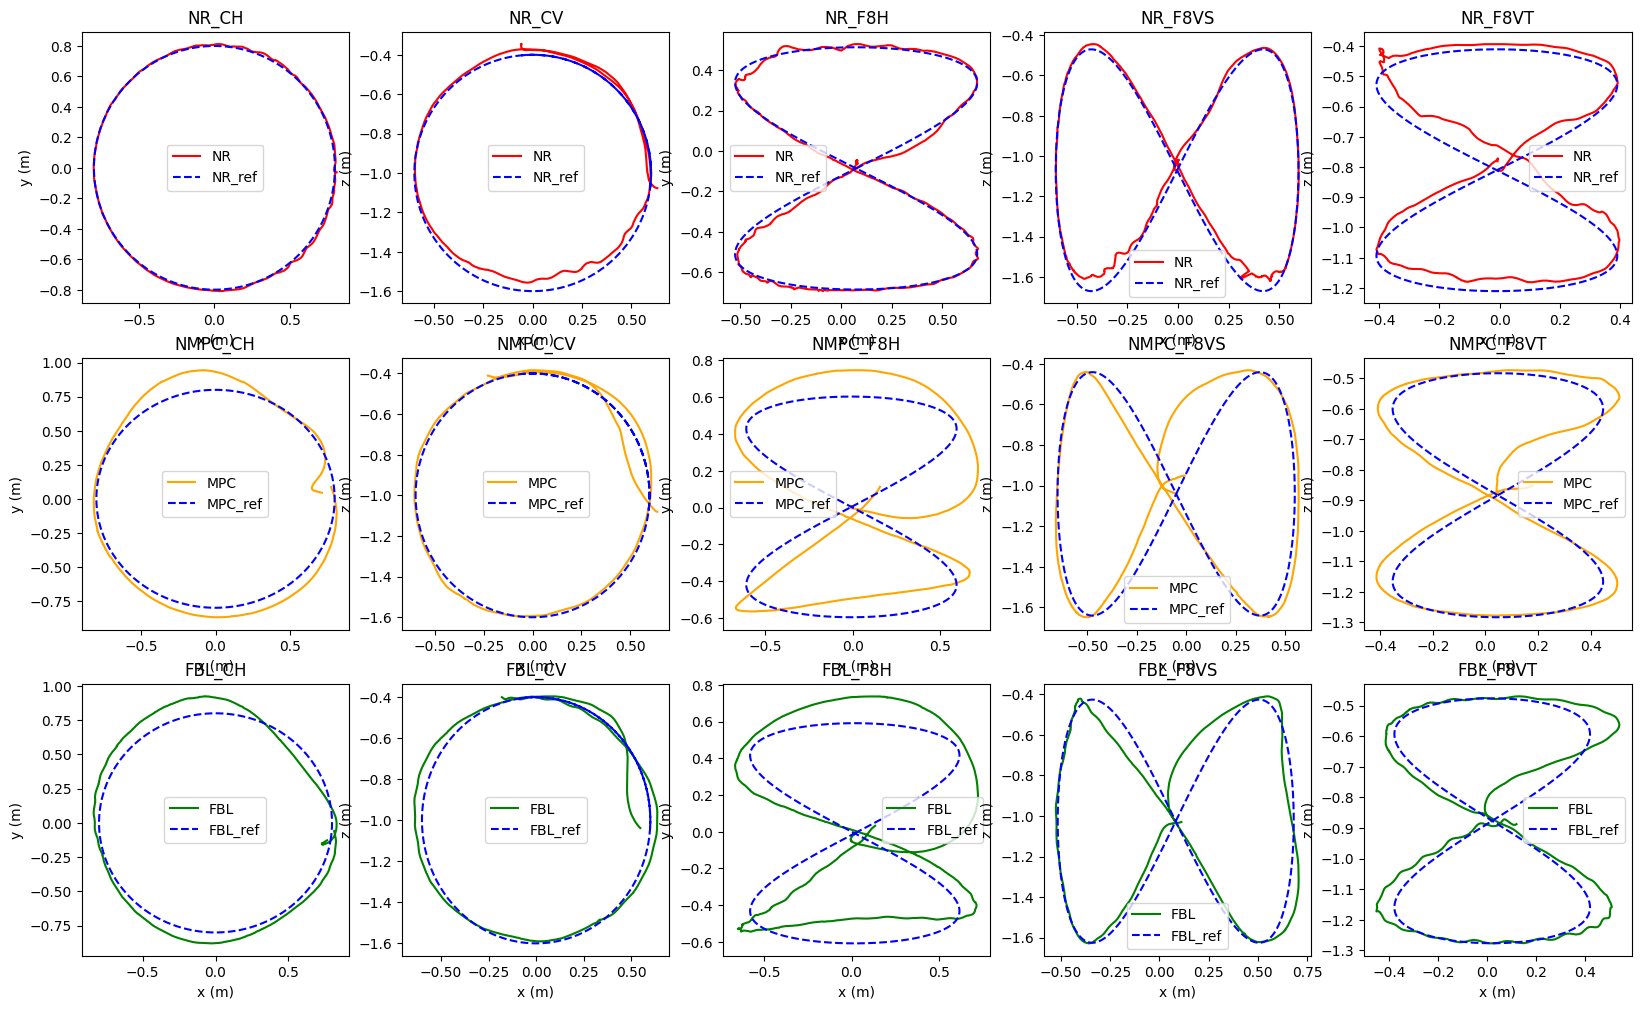

In [37]:
fig, axs = plt.subplots(3, 5, figsize=(20, 12), sharex=False)
for i in range(1, 6):
    NR = NR_dict[str(i)]
    MPC = MPC_dict[str(i)]
    FBL = FBL_dict[str(i)]

    names = (NR[9:-4], MPC[9:-4], FBL[9:-4])
    # print(names)
    if 'CH' in NR or 'F8H' in NR:
        plane = 'xy'

    elif 'CV' in NR or 'F8VS' in NR or 'F8VT' in NR:
        plane = 'xz'

    NR_log_file_path = data_path + NR
    MPC_log_file_path = data_path + MPC
    FBL_log_file_path = data_path + FBL
    
    NR_df_log = pd.read_csv(NR_log_file_path, header=0, dtype={'metadata': str})
    MPC_df_log = pd.read_csv(MPC_log_file_path, header=0, dtype={'metadata': str})
    FBL_df_log = pd.read_csv(FBL_log_file_path, header=0, dtype={'metadata': str})

    # print(f"{i}) {NR[:-4]}")
    plot_together(names, NR_df_log, MPC_df_log, FBL_df_log, plane, i-1, axs)

In [42]:
def plot_together_HX(names, NR_df, MPC_df, FBL_df):
    pass
def plot_together_CH_SPIN(names, NR_df, MPC_df, FBL_df):
    pass
def plot_together_HX_SPIN(names, NR_df, MPC_df, FBL_df):
    pass

# Plot Separately!

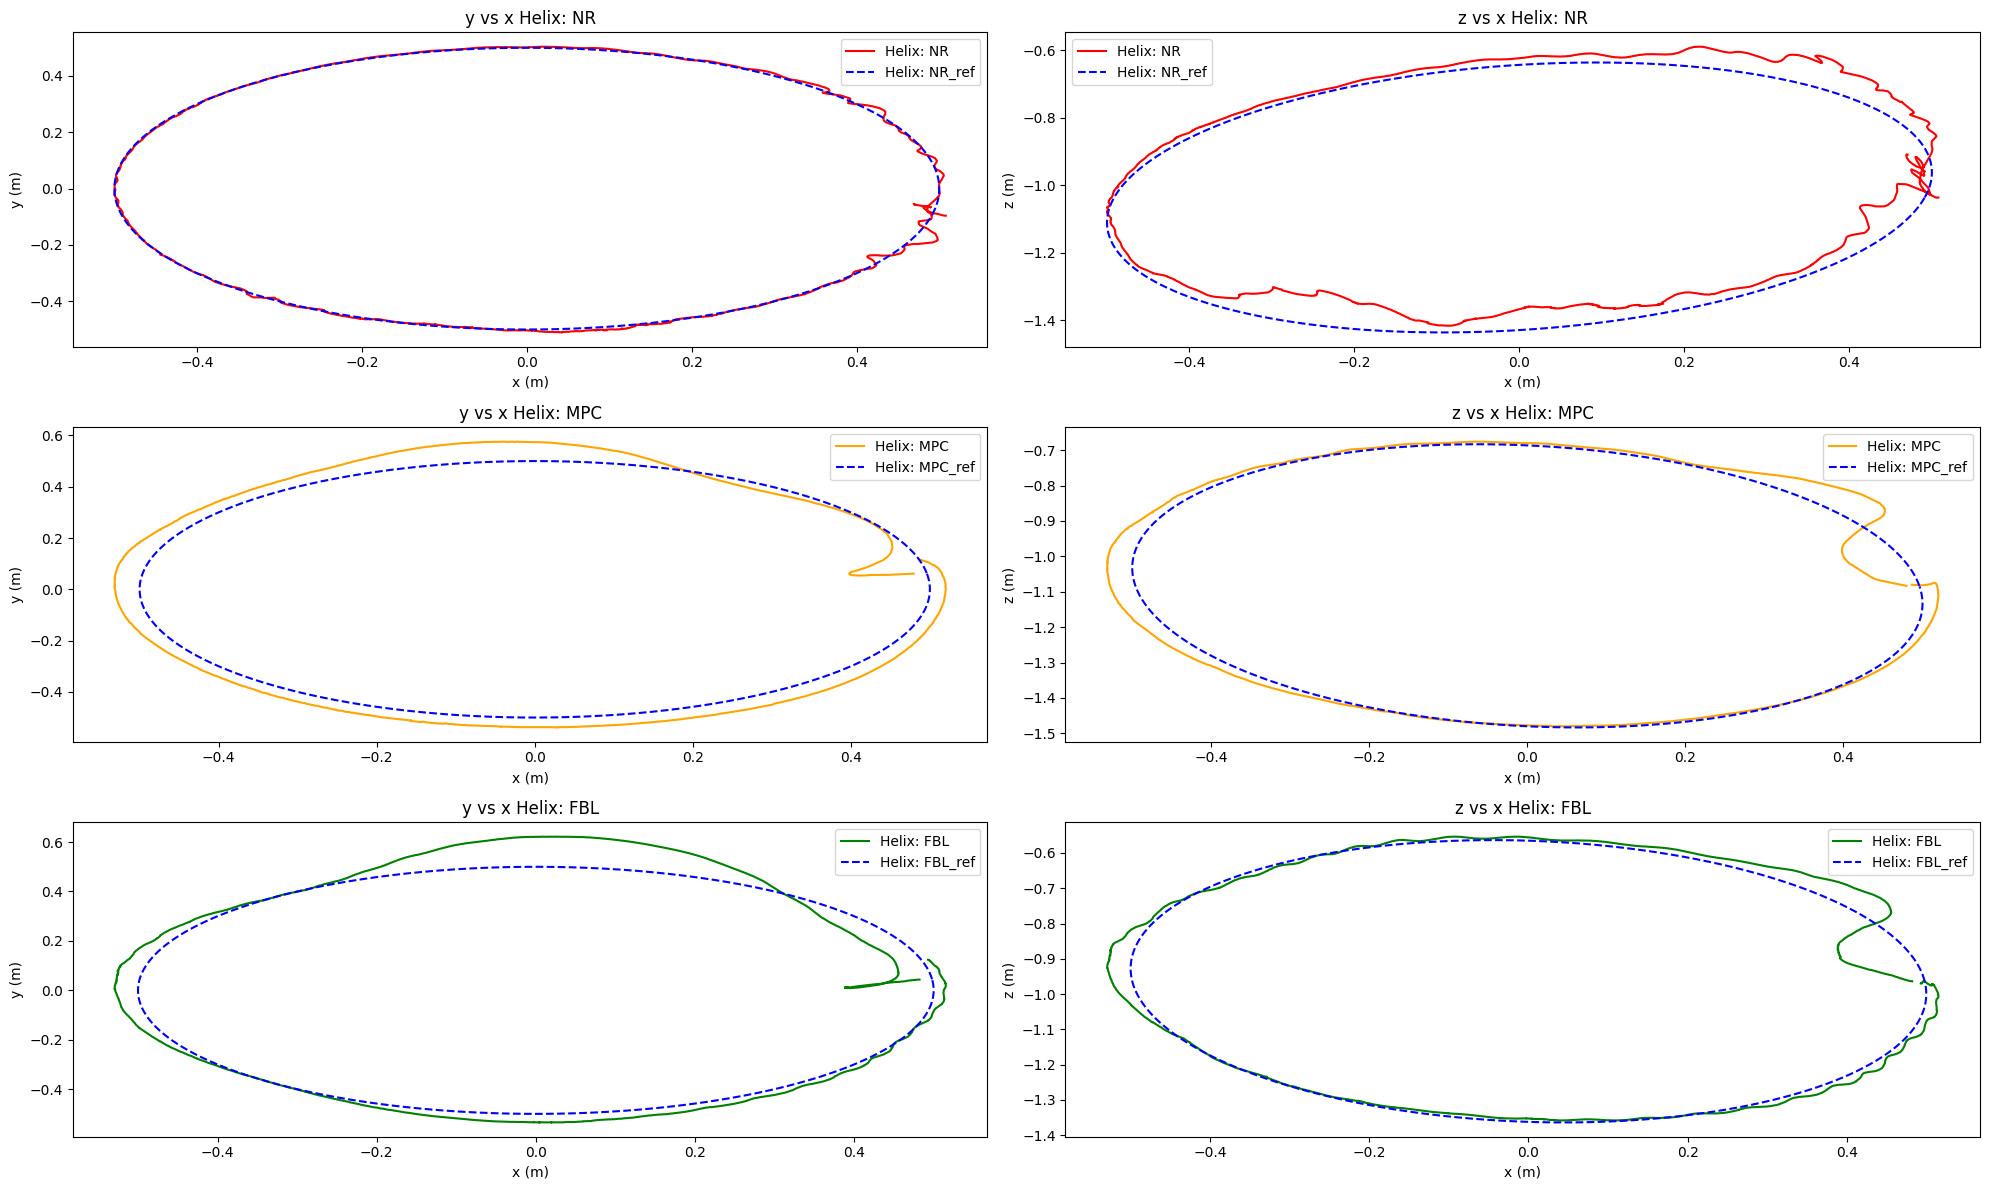

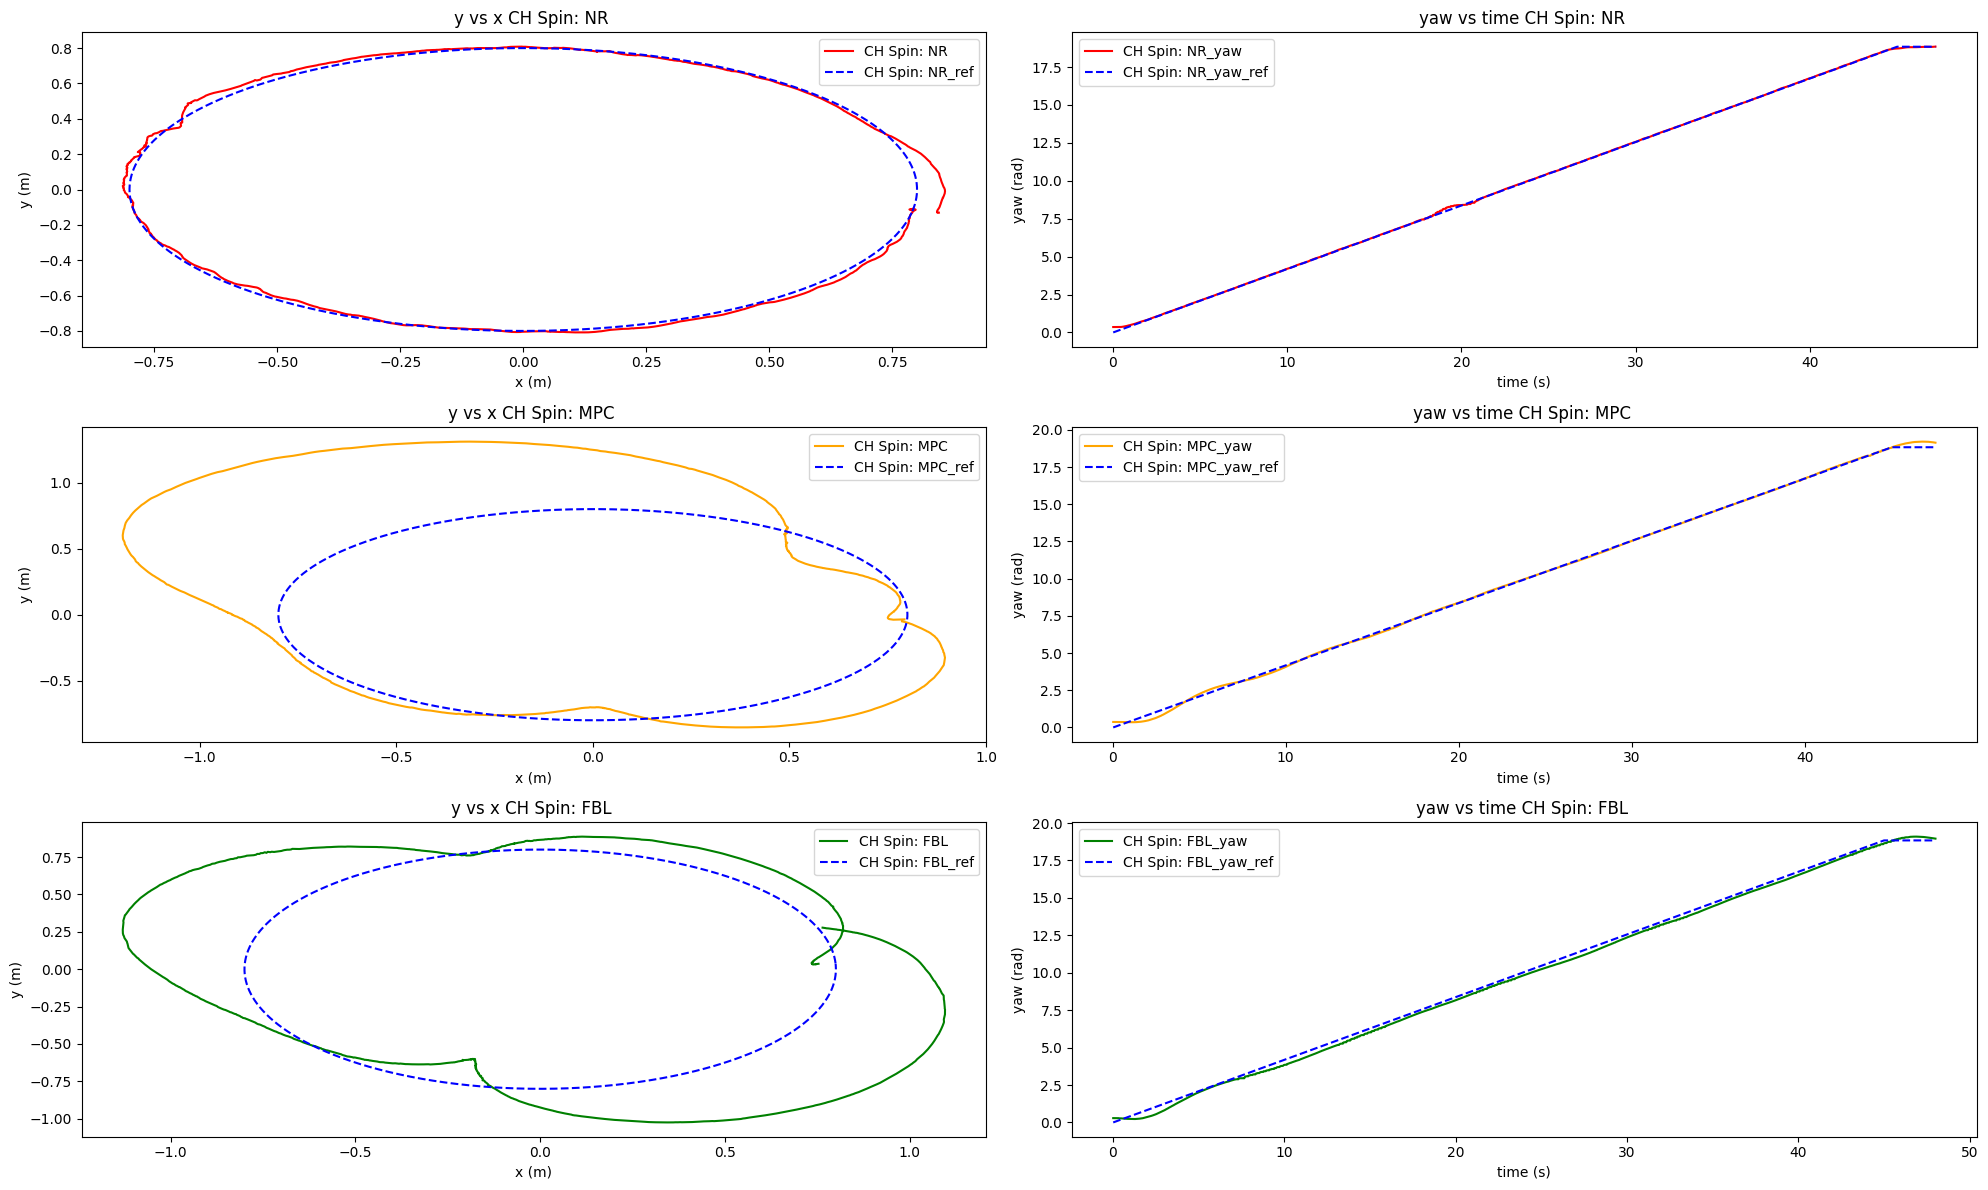

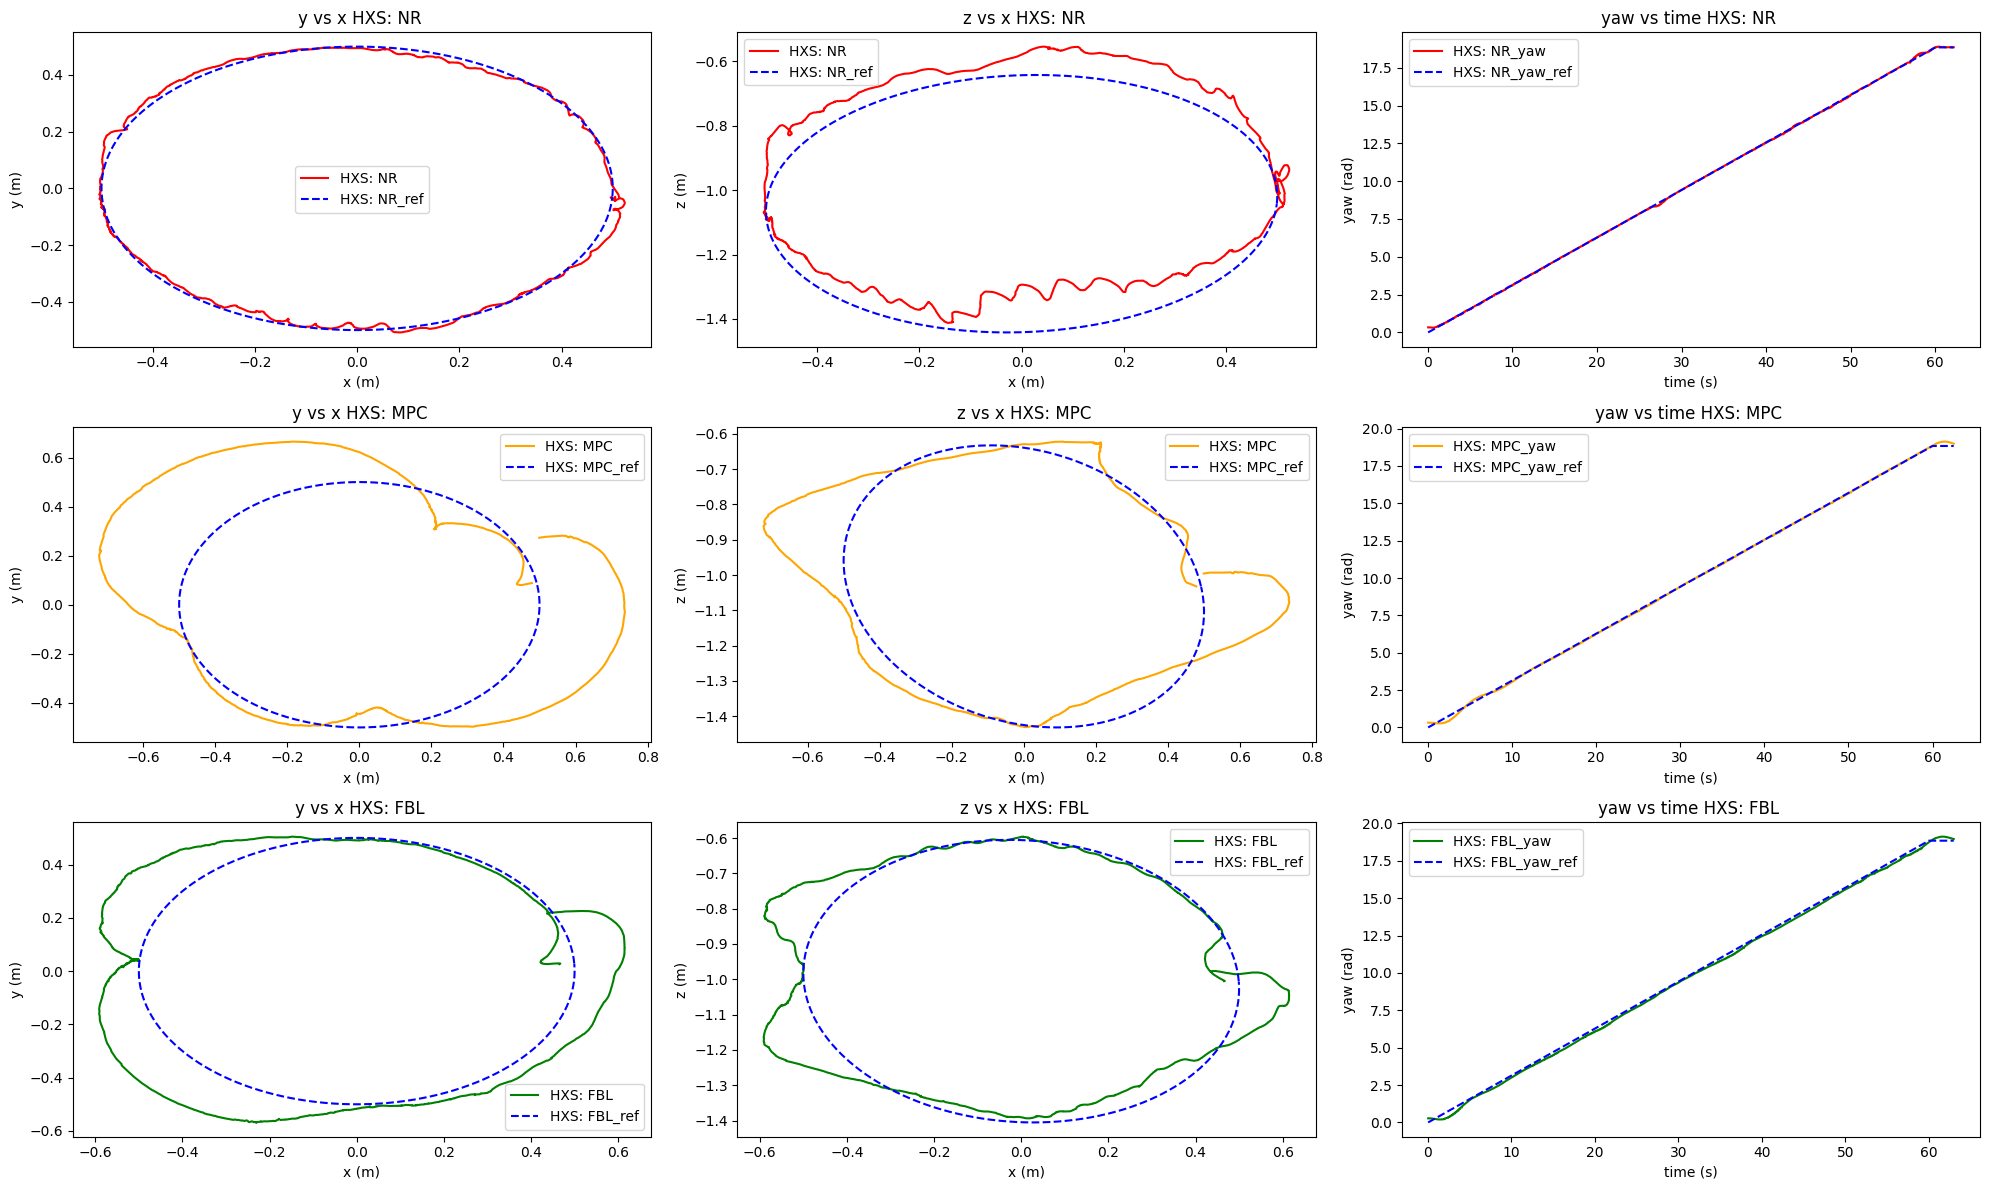

In [56]:
import matplotlib.pyplot as plt

def plot_together_HX(names, NR_df, MPC_df, FBL_df):
    fig, axs = plt.subplots(3, 2, figsize=(20, 12))
    
    # y vs x and z vs x for NR, MPC, FBL
    controllers = [(NR_df, 'Helix: NR', 'red'), (MPC_df, 'Helix: MPC', 'orange'), (FBL_df, 'Helix: FBL', 'green')]
    
    for i, (df, label, color) in enumerate(controllers):
        axs[i, 0].plot(df['x'], df['y'], label=f'{label}', color=color)
        axs[i, 0].plot(df['x_ref'], df['y_ref'], label=f'{label}_ref', color='blue', linestyle='--')
        axs[i, 0].set_xlabel('x (m)')
        axs[i, 0].set_ylabel('y (m)')
        axs[i, 0].legend()
        axs[i, 0].set_title(f'y vs x {label}')

        axs[i, 1].plot(df['x'], df['z'], label=f'{label}', color=color)
        axs[i, 1].plot(df['x_ref'], df['z_ref'], label=f'{label}_ref', color='blue', linestyle='--')
        axs[i, 1].set_xlabel('x (m)')
        axs[i, 1].set_ylabel('z (m)')
        axs[i, 1].legend()
        axs[i, 1].set_title(f'z vs x {label}')
    
    plt.tight_layout()
    plt.show()

def plot_together_CH_SPIN(names, NR_df, MPC_df, FBL_df):
    fig, axs = plt.subplots(3, 2, figsize=(20, 12))

    # y vs x and yaw vs time for NR, MPC, FBL
    controllers = [(NR_df, 'CH Spin: NR', 'red'), (MPC_df, 'CH Spin: MPC', 'orange'), (FBL_df, 'CH Spin: FBL', 'green')]
    
    for i, (df, label, color) in enumerate(controllers):
        axs[i, 0].plot(df['x'], df['y'], label=f'{label}', color=color)
        axs[i, 0].plot(df['x_ref'], df['y_ref'], label=f'{label}_ref', color='blue', linestyle='--')
        axs[i, 0].set_xlabel('x (m)')
        axs[i, 0].set_ylabel('y (m)')
        axs[i, 0].legend()
        axs[i, 0].set_title(f'y vs x {label} ')

        axs[i, 1].plot(df['time'], df['psi'], label=f'{label}_yaw', color=color)
        axs[i, 1].plot(df['time'], df['psi_ref'], label=f'{label}_yaw_ref', color='blue', linestyle='--')
        axs[i, 1].set_xlabel('time (s)')
        axs[i, 1].set_ylabel('yaw (rad)')
        axs[i, 1].legend()
        axs[i, 1].set_title(f'yaw vs time {label} ')
    
    plt.tight_layout()
    plt.show()

def plot_together_HX_SPIN(names, NR_df, MPC_df, FBL_df):
    fig, axs = plt.subplots(3, 3, figsize=(20, 12))

    # y vs x, z vs x, and yaw vs time for NR, MPC, FBL
    controllers = [(NR_df, 'HXS: NR', 'red'), (MPC_df, 'HXS: MPC', 'orange'), (FBL_df, 'HXS: FBL', 'green')]
    
    for i, (df, label, color) in enumerate(controllers):
        axs[i, 0].plot(df['x'], df['y'], label=f'{label}', color=color)
        axs[i, 0].plot(df['x_ref'], df['y_ref'], label=f'{label}_ref', color='blue', linestyle='--')
        axs[i, 0].set_xlabel('x (m)')
        axs[i, 0].set_ylabel('y (m)')
        axs[i, 0].legend()
        axs[i, 0].set_title(f'y vs x {label} ')

        axs[i, 1].plot(df['x'], df['z'], label=f'{label}', color=color)
        axs[i, 1].plot(df['x_ref'], df['z_ref'], label=f'{label}_ref', color='blue', linestyle='--')
        axs[i, 1].set_xlabel('x (m)')
        axs[i, 1].set_ylabel('z (m)')
        axs[i, 1].legend()
        axs[i, 1].set_title(f'z vs x {label} ')

        axs[i, 2].plot(df['time'], df['psi'], label=f'{label}_yaw', color=color)
        axs[i, 2].plot(df['time'], df['psi_ref'], label=f'{label}_yaw_ref', color='blue', linestyle='--')
        axs[i, 2].set_xlabel('time (s)')
        axs[i, 2].set_ylabel('yaw (rad)')
        axs[i, 2].legend()
        axs[i, 2].set_title(f'yaw vs time {label} ')

    plt.tight_layout()
    plt.show()

# Example usage within the loop
for i in range(6, 9):
    NR = NR_dict[str(i)]
    MPC = MPC_dict[str(i)]
    FBL = FBL_dict[str(i)]

    names = (NR[9:-4], MPC[9:-4], FBL[9:-4])

    NR_log_file_path = data_path + NR
    MPC_log_file_path = data_path + MPC
    FBL_log_file_path = data_path + FBL
    
    NR_df_log = pd.read_csv(NR_log_file_path, header=0, dtype={'metadata': str})
    MPC_df_log = pd.read_csv(MPC_log_file_path, header=0, dtype={'metadata': str})
    FBL_df_log = pd.read_csv(FBL_log_file_path, header=0, dtype={'metadata': str})

    if i == 6:
        plot_together_HX(names, NR_df_log, MPC_df_log, FBL_df_log)  # y vs x and z vs x
    elif i == 7:
        plot_together_CH_SPIN(names, NR_df_log, MPC_df_log, FBL_df_log)  # y vs x and yaw vs time
    elif i == 8:
        plot_together_HX_SPIN(names, NR_df_log, MPC_df_log, FBL_df_log)  # y vs x, z vs x, and yaw vs time
